In [11]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [18]:
(train_images,train_labels),(test_images,test_labels)=datasets.mnist.load_data()


In [19]:
train_images,test_images=train_images/255.0,test_images/255.0

In [20]:
train_images=train_images.reshape((train_images.shape[0],28,28,1))
test_images=test_images.reshape((test_images.shape[0],28,28,1))

In [21]:
model = models.Sequential([
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax')
])

In [22]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [23]:
history = model.fit(train_images, train_labels, epochs=5,
validation_data=(test_images, test_labels))

Epoch 1/5

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.8955 - loss: 0.3352 - val_accuracy: 0.9857 - val_loss: 0.0420

Epoch 2/5

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9846 - loss: 0.0482 - val_accuracy: 0.9868 - val_loss: 0.0375

Epoch 3/5

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9902 - loss: 0.0317 - val_accuracy: 0.9898 - val_loss: 0.0312

Epoch 4/5

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9917 - loss: 0.0264 - val_accuracy: 0.9900 - val_loss: 0.0304

Epoch 5/5

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9942 - loss: 0.0190 - val_accuracy: 0.9904 - val_loss: 0.0309


In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 2s - 6ms/step - accuracy: 0.9904 - loss: 0.0309

Test accuracy: 0.9904000163078308


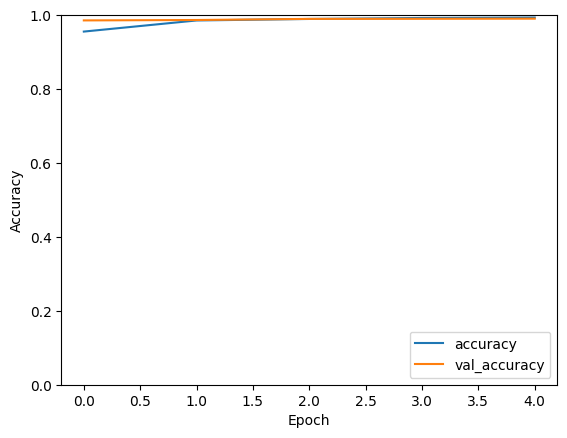

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()